In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
iris['species'] = load_iris().target
iris.drop(columns=['petal length (cm)', 'petal width (cm)'], inplace=True)

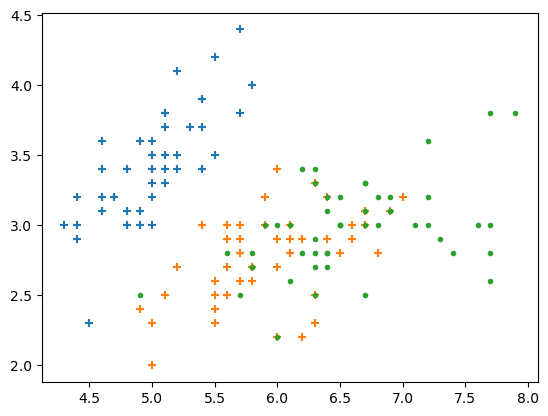

In [63]:
iris0 = iris[iris.species ==0]
iris1 = iris[iris.species ==1]
iris2 = iris[iris.species ==2]

plt.scatter(iris0['sepal length (cm)'], iris0['sepal width (cm)'], marker='+')
plt.scatter(iris1['sepal length (cm)'], iris1['sepal width (cm)'], marker='+')
plt.scatter(iris2['sepal length (cm)'], iris2['sepal width (cm)'], marker='.')


In [64]:
iris

,sepal length (cm),sepal width (cm),species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris[['sepal length (cm)']])
iris['sepal length'] = scaler.fit_transform(iris[['sepal length (cm)']])

scaler.fit(iris[['sepal width (cm)']])
iris['sepal width'] = scaler.fit_transform(iris[['sepal width (cm)']])

iris.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
iris

,species,sepal length,sepal width
0,0,0.222222,0.625000
1,0,0.166667,0.416667
2,0,0.111111,0.500000
3,0,0.083333,0.458333
4,0,0.194444,0.666667
...,...,...,...
145,2,0.666667,0.416667
146,2,0.555556,0.208333
147,2,0.611111,0.416667
148,2,0.527778,0.583333


In [68]:
from sklearn.cluster import KMeans
k_rng = range(3, 15)
sse = [] 
for k in k_rng:
	km = KMeans(n_clusters=k)
	km.fit(iris[['sepal length']], iris[['sepal width']])
	sse.append(km.inertia_)

In [69]:
sse

[1.261395933108656,
 0.6960439813327234,
 0.4295470809725194,
 0.2932910551987345,
 0.21230057746118086,
 0.20253640280562604,
 0.1345365393649413,
 0.09674582160995186,
 0.07862497791456907,
 0.06170615649782294,
 0.05630479666938012,
 0.04932178217202356]

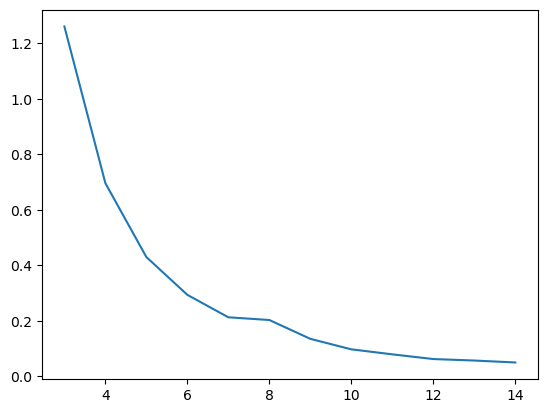

In [70]:
plt.plot(k_rng, sse)

In [82]:
km = KMeans(n_clusters=7)
cluster = km.fit_predict(iris[['sepal length', 'sepal width']])
iris['cluster'] = cluster
iris.head()

,species,sepal length,sepal width,cluster
0,0,0.222222,0.625000,3
1,0,0.166667,0.416667,5
2,0,0.111111,0.500000,5
3,0,0.083333,0.458333,5
4,0,0.194444,0.666667,3
